# Proyek Pertama: Membuat Model NLP dengan TensorFlow

---

### Dicoding Submission
### Belajar Pengembangan Machine Learning

---

Kriteria submission:
- Dataset yang akan dipakai **bebas**, namun **minimal memiliki 1000 sampel**.
- Harus menggunakan `LSTM` dalam arsitektur model.
- Harus menggunakan model `sequential`.
- **Validation set** sebesar **20%** dari total dataset.
- Harus menggunakan `Embedding`.
- Harus menggunakan fungsi `tokenizer`.
- **Akurasi** dari model minimal **75%** pada train set dan validation set.

---

Saran dan Tips:
- Akurasi dari model di atas **80%**.
- Mengimplementasikan `callback`.
- Membuat `plot loss` dan `akurasi` pada saat `training` dan `validation`.

---

- **Bintang 3** : Semua ketentuan terpenuhi namun hanya mengikuti seperti apa yang ada pada modul.
- **Bintang 4** : Semua ketentuan terpenuhi, dataset memiliki **minimal 2000** sampel data dan **akurasi** pada training set dan validation set di atas **85%**.
- **Bintang 5** : Semua ketentuan terpenuhi, dataset memiliki **3 kelas atau lebih** dan **minimal 2000** sampel data. Serta **akurasi** pada training set dan validation set di atas **90%**.

---

# Data Diri

Nama: Andrew Benedictus Jamesie  
E-mail: andrewbjamesie@yahoo.com  

---
---

In [ ]:
import pandas as pd

# Read csv data train
df = pd.read_csv('drive/MyDrive/train.csv', encoding='latin-1')

# Scramble the data
df = df.sample(frac=1).reset_index(drop=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


,Class Index,Title,Description
0,2,Gunners go to Liverpool stung by more negative...,Arsenal gained a 1-1 tie with nine men against...
1,1,"Saudi Police, Militants Clash in Capital Riyadh","Saudi security forces, battling a wave of al Q..."
2,4,Microsoft offers to replace fake Windows XP,Users who fear that their Windows XP software ...
3,1,Veterans Set for Republican Convention (AP),AP - Americans who served in the military will...
4,2,Vic #39;s a knock-out,"VIC Darchinyan, the mighty atom of Australian ..."
...,...,...,...
119995,4,Ballmer Touts Microsoft #39;s Innovation In Sp...,Microsoft CEO Steve Ballmer said innovation an...
119996,3,Markets welcome Bush victory with a stock rally,Wall Street cheered the incumbents victory wit...
119997,3,Brazilian singer mines musical heritage for st...,"SAO PAULO, Brazil - Brazilian newcomer Maria R..."
119998,2,No Charge For Beckham,The Football Association have decided against ...


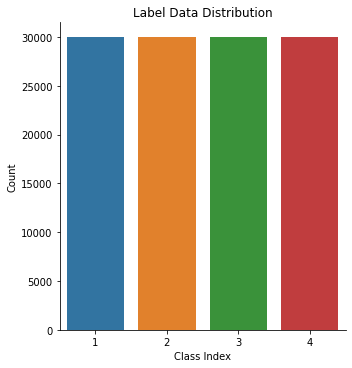

In [ ]:
# Label Data Distribution/Proportion Graph
import seaborn as sns
import matplotlib.pyplot as plt

count = df['Class Index'].value_counts()
sns.catplot(x='Class Index', kind='count', data=df)
plt.title('Label Data Distribution')
plt.xlabel('Class Index')
plt.ylabel('Count')
plt.show()

In [ ]:
# Change the label into individual categories
# One hot encoding
category = pd.get_dummies(df['Class Index'])
df_new   = pd.concat([df, category], axis=1)
df_new   = df_new.drop(['Class Index', 'Title'], axis=1)
df_new

,Description,1,2,3,4
0,Arsenal gained a 1-1 tie with nine men against...,0,1,0,0
1,"Saudi security forces, battling a wave of al Q...",1,0,0,0
2,Users who fear that their Windows XP software ...,0,0,0,1
3,AP - Americans who served in the military will...,1,0,0,0
4,"VIC Darchinyan, the mighty atom of Australian ...",0,1,0,0
...,...,...,...,...,...
119995,Microsoft CEO Steve Ballmer said innovation an...,0,0,0,1
119996,Wall Street cheered the incumbents victory wit...,0,0,1,0
119997,"SAO PAULO, Brazil - Brazilian newcomer Maria R...",0,0,1,0
119998,The Football Association have decided against ...,0,1,0,0


In [ ]:
# Rename the column name
df_new = df_new.rename(columns = {
    1 : 'world',
    2 : 'sports',
    3 : 'business',
    4 : 'sci-tech',
})

df_new.info()
df_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Description  120000 non-null  object
 1   world        120000 non-null  uint8 
 2   sports       120000 non-null  uint8 
 3   business     120000 non-null  uint8 
 4   sci-tech     120000 non-null  uint8 
dtypes: object(1), uint8(4)
memory usage: 1.4+ MB


,Description,world,sports,business,sci-tech
0,Arsenal gained a 1-1 tie with nine men against...,0,1,0,0
1,"Saudi security forces, battling a wave of al Q...",1,0,0,0
2,Users who fear that their Windows XP software ...,0,0,0,1
3,AP - Americans who served in the military will...,1,0,0,0
4,"VIC Darchinyan, the mighty atom of Australian ...",0,1,0,0
...,...,...,...,...,...
119995,Microsoft CEO Steve Ballmer said innovation an...,0,0,0,1
119996,Wall Street cheered the incumbents victory wit...,0,0,1,0
119997,"SAO PAULO, Brazil - Brazilian newcomer Maria R...",0,0,1,0
119998,The Football Association have decided against ...,0,1,0,0


In [ ]:
# Lower case, and delete whitespace
import string
df_new['Description'] = df_new['Description'].str.lower().str.strip()

In [ ]:
# Delete punctuation (tanda baca)
def removePunctuation(text):
    for punct in string.punctuation:
        text = text.replace(punct, ' ')
    return text

df_new['Description'] = df_new['Description'].apply(removePunctuation)

In [ ]:
# Delete stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

df_new['Description'] = df_new['Description'].apply(lambda x: ' '.join([
    word for word in x.split() if word not in (stop)
]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Seperate text and label values respectively in dataframe into numpy data type
tweet = df_new['Description'].values
label = df_new[['world', 'sports', 'business', 'sci-tech']].values

In [ ]:
# Train and test data split
from sklearn.model_selection import train_test_split

descTrain, descTest, labelTrain, labelTest = train_test_split(tweet, label, test_size=0.2, random_state=1)

print(f'Train : {descTrain.shape} {labelTrain.shape}')
print(f'Test  : {descTest.shape} {labelTest.shape}')

Train : (96000,) (96000, 4)
Test  : (24000,) (24000, 4)


In [ ]:
# Tokenizer sequence and padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='x')
tokenizer.fit_on_texts(descTrain)
tokenizer.fit_on_texts(descTest)

sequenceTrain = tokenizer.texts_to_sequences(descTrain)
sequenceTest  = tokenizer.texts_to_sequences(descTest)

paddedTrain = pad_sequences(sequenceTrain, maxlen=100)
paddedTest  = pad_sequences(sequenceTest,  maxlen=100)

In [ ]:
len(tokenizer.word_index)

60592

In [ ]:
# Model architecture
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(4,  activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         164864    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0

In [ ]:
# Callback
class stopCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.9):
            print('\naccuracy and val_accuracy reach > 90%')
            self.model.stop_training = True

stopTraining = stopCallback()

reduceLROP   = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

In [ ]:
epoch = 10

history = model.fit(
    paddedTrain,
    labelTrain,
    batch_size      = 128,
    epochs          = epoch,
    steps_per_epoch = 10,
    validation_data = (paddedTest, labelTest),
    verbose         = 2,
    callbacks       = [reduceLROP]
)

Epoch 1/10
3000/3000 - 535s - loss: 0.4271 - accuracy: 0.8508 - val_loss: 0.2957 - val_accuracy: 0.9015 - lr: 0.0010 - 535s/epoch - 178ms/step
Epoch 2/10
3000/3000 - 545s - loss: 0.2643 - accuracy: 0.9139 - val_loss: 0.2797 - val_accuracy: 0.9076 - lr: 0.0010 - 545s/epoch - 182ms/step
Epoch 3/10
3000/3000 - 535s - loss: 0.2200 - accuracy: 0.9276 - val_loss: 0.2877 - val_accuracy: 0.9064 - lr: 0.0010 - 535s/epoch - 178ms/step
Epoch 4/10
3000/3000 - 545s - loss: 0.1836 - accuracy: 0.9387 - val_loss: 0.3104 - val_accuracy: 0.9016 - lr: 0.0010 - 545s/epoch - 182ms/step
Epoch 5/10
3000/3000 - 546s - loss: 0.1170 - accuracy: 0.9608 - val_loss: 0.3554 - val_accuracy: 0.9045 - lr: 1.0000e-04 - 546s/epoch - 182ms/step
Epoch 6/10
3000/3000 - 543s - loss: 0.1006 - accuracy: 0.9662 - val_loss: 0.3831 - val_accuracy: 0.9036 - lr: 1.0000e-04 - 543s/epoch - 181ms/step
Epoch 7/10
3000/3000 - 546s - loss: 0.0870 - accuracy: 0.9719 - val_loss: 0.3914 - val_accuracy: 0.9034 - lr: 1.0000e-05 - 546s/epoch 

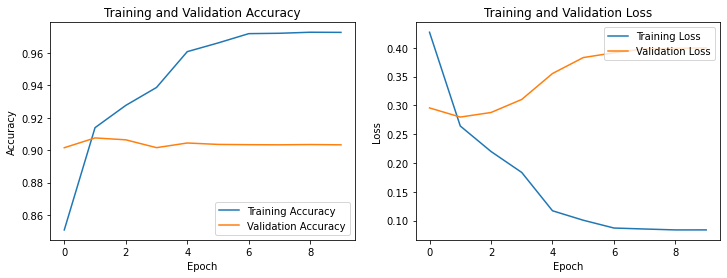

In [ ]:
accuracy     = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss         = history.history['loss']
val_loss     = history.history['val_loss']

epoch_range  = range(epoch)

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, accuracy,     label='Training Accuracy')
plt.plot(epoch_range, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss,     label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()